# Capstone Project - Boil Order Classifier
### Author: Chris Mantell

**1. Data Acquistion**

The dataset for this capstone comes from the HealthMap, an epidemiological and disease surveillance tool that monitors content from many different sources for information on infectious disease outbreaks. 

The HealthMap automatically pulls in content from the web every hour from many different sources and an algorithm classifies the content by disease, location, and affected species.  The content is then curated, usually within 24 hours of being pulled into the system, by people with infectious disease knowledge to obtain further precision in location and/or to correct misclassifications by the algorith.  

This particular dataset is about all "Waterborne Illness" alerts coming from the Google News English feed from 5/10/2010 - 10/27/2017.  These alerts include boil order alerts (the target) but also alerts relating to bacteria in water supplies or other topics will not be used.  Further data curation needs to be done to classify boil order alerts from the entire dataset.  This will be done by myself, who has domain understanding as a previous worker with the HealthMap.

**Data Dictionary (Feature Name: Discription)**

> "Location" : Location of where the alert is referencing.  Locations can be a country, state/province, county, town.

> "Country": Country where the alert is referencing.

> "Disease": Disease that the alert is referencing.  This should all be "Waterborne Illness"

> "HM Alert": HealthMap Alert - the unique ID for alert.

> "Headline": The headline of the news article that the alert references.

> "URL": The URL for the news article that the alert references.  The HealthMap also saves the HTML of each alert on their server in the event that webpages are removed or go down.  Therefore, news articles can always be accessed if need be.

> "Issue Date": The date and time the web article was published.

> "Alert Tag": The classification of the type of alert:
>> "Breaking": Alerts about outbreaks currently happening or updates on outbreaks currently happening.

>> "Warning": Alerts about outbreaks that may happen soon.

>> "Old News": Alerts referencing outbreaks in the past.

>> "Content": Alerts referencing information about infectious disease or outbreaks, but not about the outbreak itself.

>> "NDR": Not Disease Related.

>> "No Tag": No tag indicated.  Most likely due to human error or because the alert has yet to be curated.

> "Dup Count": The number of duplicate articles or "children" under the alert.

> "Long": The longitude of the alert location.

> "Lat": The latitude of the alert location.

> "Smooshed Parser Extract": Automated extraction of the text of the article.  This is most likely the text that the algorith uses to classify the alert.

> "Place Categories": An extra categorization column to help give more information about the alert.  This can be assigned by the human curator or by the algorithm.  Ex: An alert about elementary school kids drinking water with a high lead content may have a Place Category of "School II: elementary + high school.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [50]:
#Load the data
df = pd.read_csv('./HealthMap_Waterborne_2010-2017-GNE_US.csv', encoding='latin-1')
df.head()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,...,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118
0,"Delaware, United States",United States,Waterborne Illness,Humans,5407609,Kutcher tells Council about water situation - ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/27/17 1:11,Breaking,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Kentucky, United States",United States,Waterborne Illness,Humans,5407269,"Under boil order, Murray awaits water test res...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 18:33,Breaking,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Puerto Rico,United States,Waterborne Illness,Humans,5405438,Puerto Ricans at Risk of Waterborne Disease Ou...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 7:20,Warning,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Michigan, United States",United States,Waterborne Illness,Humans,5404851,"Howes: In Flint water war, city only has one c...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 0:02,Breaking,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Pennsylvania, United States",United States,Waterborne Illness,Humans,5404604,DEP orders PWSA to make critical infrastrucure...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 18:19,Breaking,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.dtypes

Location                    object
Country                     object
Disease                     object
Species                     object
HM Alert ID                  int64
Headline                    object
URL                         object
Issue Date                  object
Alert Tag                   object
Dup Count                   object
Long                        object
Lat                         object
Smooshed Parser Extract     object
Place Categories            object
Unnamed: 14                 object
Unnamed: 15                 object
Unnamed: 16                 object
Unnamed: 17                 object
Unnamed: 18                 object
Unnamed: 19                 object
Unnamed: 20                 object
Unnamed: 21                 object
Unnamed: 22                 object
Unnamed: 23                 object
Unnamed: 24                 object
Unnamed: 25                 object
Unnamed: 26                 object
Unnamed: 27                 object
Unnamed: 28         

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Columns: 119 entries, Location to Unnamed: 118
dtypes: float64(9), int64(1), object(109)
memory usage: 7.0+ MB


In [53]:
df.iloc[:, 14:].isnull().sum()

Unnamed: 14     7724
Unnamed: 15     7724
Unnamed: 16     7724
Unnamed: 17     7724
Unnamed: 18     7724
Unnamed: 19     7724
Unnamed: 20     7724
Unnamed: 21     7724
Unnamed: 22     7724
Unnamed: 23     7724
Unnamed: 24     7724
Unnamed: 25     7724
Unnamed: 26     7724
Unnamed: 27     7724
Unnamed: 28     7724
Unnamed: 29     7724
Unnamed: 30     7724
Unnamed: 31     7724
Unnamed: 32     7724
Unnamed: 33     7724
Unnamed: 34     7724
Unnamed: 35     7724
Unnamed: 36     7724
Unnamed: 37     7724
Unnamed: 38     7724
Unnamed: 39     7724
Unnamed: 40     7724
Unnamed: 41     7724
Unnamed: 42     7724
Unnamed: 43     7724
                ... 
Unnamed: 89     7724
Unnamed: 90     7724
Unnamed: 91     7724
Unnamed: 92     7724
Unnamed: 93     7724
Unnamed: 94     7724
Unnamed: 95     7724
Unnamed: 96     7724
Unnamed: 97     7724
Unnamed: 98     7724
Unnamed: 99     7724
Unnamed: 100    7724
Unnamed: 101    7724
Unnamed: 102    7724
Unnamed: 103    7724
Unnamed: 104    7724
Unnamed: 105 

In [54]:
df.shape

(7725, 119)

In [55]:
df.isnull().sum()

Location                      0
Country                       0
Disease                       0
Species                       0
HM Alert ID                   0
Headline                      0
URL                           0
Issue Date                    0
Alert Tag                     0
Dup Count                     0
Long                          0
Lat                           0
Smooshed Parser Extract    2554
Place Categories           7531
Unnamed: 14                7724
Unnamed: 15                7724
Unnamed: 16                7724
Unnamed: 17                7724
Unnamed: 18                7724
Unnamed: 19                7724
Unnamed: 20                7724
Unnamed: 21                7724
Unnamed: 22                7724
Unnamed: 23                7724
Unnamed: 24                7724
Unnamed: 25                7724
Unnamed: 26                7724
Unnamed: 27                7724
Unnamed: 28                7724
Unnamed: 29                7724
                           ... 
Unnamed:

In [56]:
df['Unnamed: 14'].isnull().sum()

7724

In [57]:
df.iloc[:, 14:].head()

,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,...,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
columns_to_drop = [col for col in df.iloc[:, 14:].columns]

In [59]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [60]:
# Lots of missing texts in Smooshed Parser Extract.  Will have to grab some from manual curation.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 14 columns):
Location                   7725 non-null object
Country                    7725 non-null object
Disease                    7725 non-null object
Species                    7725 non-null object
HM Alert ID                7725 non-null int64
Headline                   7725 non-null object
URL                        7725 non-null object
Issue Date                 7725 non-null object
Alert Tag                  7725 non-null object
Dup Count                  7725 non-null object
Long                       7725 non-null object
Lat                        7725 non-null object
Smooshed Parser Extract    5171 non-null object
Place Categories           194 non-null object
dtypes: int64(1), object(13)
memory usage: 845.0+ KB


In [61]:
df['Species'].value_counts()

Humans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             7724
 CRUEL CONTENT*** THIRD classmate dies as hateful online rantings of Ohio... A brief history of the time Stephen Hawking went to a sex... Sexpresso: Wives ban their husbands from visiting Italian... Race against the tide: Bravery of young mother who stayed by... Photo of gay marine leaping into the arms of his boyfriend... Airport emergency in New Jersey as 'landing gear problem'..

In [62]:
# Strange row - possible reason for many unnammed columns.  Will drop
df.loc[(df['Species'] != 'Humans')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
6997,- was thwarted this year after animal rights ...,the dogs are simply thrown into the water and...,but it is better than it was. 'Some of these ...,CRUEL CONTENT*** THIRD classmate dies as hate...,70,as he is handed sex... 'It came so close it s...,or debate this issue live on our message boar...,the other side,28/2/2012 20:30 Human beings again being cruel,they should wipe out the human race,they,re just getting worse!!!! - elaine,worcestershire,28/2/2012 20:29 You'll be sorry when you or a...


In [63]:
df.drop(6997, axis=0, inplace=True)

In [64]:
df['Alert Tag'].value_counts()

Warning     5791
Context     1810
Breaking     121
No Tag         2
Name: Alert Tag, dtype: int64

In [65]:
#Will have to update and check.  Seems like this alert was not curated or mistakenly classified.
df.loc[(df['Alert Tag'] == "No Tag")]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
592,"Henderson, North Carolina, United States",United States,Waterborne Illness,Humans,5086090,"Henderson, Vance County under mandatory water ...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,6/5/17 19:27,No Tag,5,-78.403984,36.329388,NaN,NaN
593,"Oxford, North Carolina, United States",United States,Waterborne Illness,Humans,5086090,"Henderson, Vance County under mandatory water ...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,6/5/17 19:27,No Tag,5,-78.590828,36.310699,NaN,NaN


In [66]:
for i in df['Alert Tag'].value_counts():
    print(i)

5791
1810
121
2


In [67]:
counts = [i for i in df['Alert Tag'].value_counts()]
counts

[5791, 1810, 121, 2]

In [68]:
tags = ('Warning', 'Context', 'Breaking', 'No Tag')
tags

('Warning', 'Context', 'Breaking', 'No Tag')

In [69]:
df['Alert Tag'].value_counts()

Warning     5791
Context     1810
Breaking     121
No Tag         2
Name: Alert Tag, dtype: int64

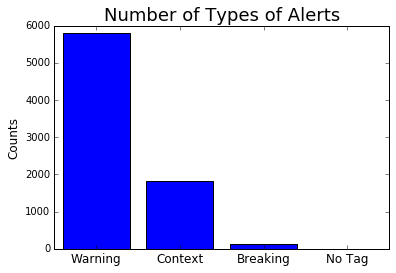

In [70]:
plt.bar(np.arange(len(tags)), counts, align='center')
plt.xticks(np.arange(len(tags)), tags, fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Number of Types of Alerts', fontsize=18)

**Most alerts should be in the Warning Tag**

In [25]:
df.loc[(df['URL'].duplicated())]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
118,"Rocky Neck, Connecticut, United States",United States,Waterborne Illness,Humans,5274123,Swim areas at some state beaches closed due to...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:06,Warning,2,-73.623177,41.012321,XXXXXX FOX 61,NaN
119,"Silver Sands Beach, Connecticut, United States",United States,Waterborne Illness,Humans,5274123,Swim areas at some state beaches closed due to...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:06,Warning,2,-72.877174,41.244175,XXXXXX FOX 61,NaN
120,"Wadsworth Falls, Connecticut, United States",United States,Waterborne Illness,Humans,5274123,Swim areas at some state beaches closed due to...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:06,Warning,2,-72.69648,41.52565,XXXXXX FOX 61,NaN
122,"Milford, Connecticut, United States",United States,Waterborne Illness,Humans,5273209,"Hammonasset, Silver Sands, Portion Of Rocky Ne...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:05,Warning,0,-73.056503,41.222321,XXXXXX Hartford Courant,NaN
123,"East Lyme, Connecticut, United States",United States,Waterborne Illness,Humans,5273209,"Hammonasset, Silver Sands, Portion Of Rocky Ne...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:05,Warning,0,-72.229523,41.353149,XXXXXX Hartford Courant,NaN
125,"Oak Beach County Park, Port Austin, Michigan, ...",United States,Waterborne Illness,Humans,5273208,Three local beaches closed Thursday - Huron Da...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:02,Warning,1,-83.127449,43.996399,NaN,NaN
126,"Thompson County Park, Caseville, Michigan, Uni...",United States,Waterborne Illness,Humans,5273208,Three local beaches closed Thursday - Huron Da...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:02,Warning,1,-83.133904,43.993069,NaN,NaN
136,"Jupiter, Florida, United States",United States,Waterborne Illness,Humans,5268606,"Bacteria warning: Midtown, Phipps beaches clos...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/22/17 20:57,Warning,0,-80.094208,26.934219,XXXXXX Palm Beach Daily News,NaN
154,"Silver Sands State Park, Connecticut, United S...",United States,Waterborne Illness,Humans,5259302,Lake Waramaug State Park among beaches closed ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/18/17 11:35,Warning,0,-73.070938,41.202599,XXXXXX Danbury News Times,NaN
155,"Indian Well State Park, Connecticut, United St...",United States,Waterborne Illness,Humans,5259302,Lake Waramaug State Park among beaches closed ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/18/17 11:35,Warning,0,-73.130112,41.34621,XXXXXX Danbury News Times,NaN


In [23]:
# Extract boil order related alerts


' XXXXXX Murray Ledger and Times'

In [24]:
#Use regex to get boil orders from headlines.   
#web scraper to pull boil order - need BS 
import requests
from bs4 import BeautifulSoup

In [24]:
df.shape

(7724, 14)

In [25]:
df.head()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
0,"Delaware, United States",United States,Waterborne Illness,Humans,5407609,Kutcher tells Council about water situation - ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/27/17 1:11,Breaking,0,-75.4981,38.9935,XXXXXX Murray Ledger and Times,NaN
1,"Kentucky, United States",United States,Waterborne Illness,Humans,5407269,"Under boil order, Murray awaits water test res...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 18:33,Breaking,8,-84.462898,37.439899,XXXXXX WPSD Local 6,NaN
2,Puerto Rico,United States,Waterborne Illness,Humans,5405438,Puerto Ricans at Risk of Waterborne Disease Ou...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 7:20,Warning,0,-66.501404,18.251301,XXXXXX Close Embed this video More videos (1...,Natural disaster related
3,"Michigan, United States",United States,Waterborne Illness,Humans,5404851,"Howes: In Flint water war, city only has one c...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 0:02,Breaking,1,-84.462898,43.580299,XXXXXX FacebookEmail Twitter Google+ LinkedIn...,NaN
4,"Pennsylvania, United States",United States,Waterborne Illness,Humans,5404604,DEP orders PWSA to make critical infrastrucure...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 18:19,Breaking,0,-77.475601,40.930099,XXXXXX {copyShortcut} to copy Link copied! Up...,NaN


In [41]:
df.Headline[0]

'Kutcher tells Council about water situation - Murray Ledger and Times'

In [42]:
soups[0]

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<!--[if lt IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie6 "> <![endif]--><!--[if IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie7 "> <![endif]--><!--[if IE 8 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie8 "> <![endif]--><!--[if IE 9 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie9 "> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html class="" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#"> <!--<![endif]-->
<head>
<base href="http://murrayledger.com/content/tncms/live/"/>
<meta content="noarchive" name="googlebot"/>
<meta content="MURRAY — City of Murray Director of Public Works &amp;amp; Utilities Tom Kutcher updated Mayor Jack Rose and the members of the city council Thursday about the ongoi

In [27]:
url = df.URL[0]
url

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGmA0yAoTj-LEPjIRxm5NB9akVvVw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651867230&ei=Cc7yWaC_H9G7zAKcpws&url=http://murrayledger.com/news/kutcher-tells-council-about-water-situation/article_2020569a-bac6-11e7-82f8-1f4b918f38ae.html'

In [28]:
res = requests.get(url)
res.status_code

200

In [29]:
soup = BeautifulSoup(res.content, 'lxml')

In [91]:
df.URL.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7715, 7716, 7717, 7718, 7719, 7720, 7721, 7722, 7723, 7724],
           dtype='int64', length=7724)

In [ ]:
def get_soups(df, column, index):
    soups = 
    counter = 0
    for index, url in enumerate(df.URL):    
    res = requests.get(url)
    if res.status_code == 404 or res.status_code == 410:
        df.at['index', 'URL'] == 'delete' 
    elif res.status_code != 200:
        print('Failed! Status code: ', res.status_code)
        print(index, url)
        continue
    else:
        pass
    soup = BeautifulSoup(res.content, 'lxml')
    soups.append(soup)
    counter += 1
    time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

In [30]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<!--[if lt IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie6 "> <![endif]--><!--[if IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie7 "> <![endif]--><!--[if IE 8 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie8 "> <![endif]--><!--[if IE 9 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie9 "> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html class="" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#"> <!--<![endif]-->
<head>
<base href="http://murrayledger.com/content/tncms/live/"/>
<meta content="noarchive" name="googlebot"/>
<meta content="MURRAY — City of Murray Director of Public Works &amp;amp; Utilities Tom Kutcher updated Mayor Jack Rose and the members of the city council Thursday about the ongoi

In [25]:
import time

In [26]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):    
    res = requests.get(url)
    if res.status_code == 404 or res.status_code == 410:
        df.at[index, 'URL'] = 'deleted' 
    elif res.status_code != 200:
        print('Failed! Status code: ', res.status_code)
        print(index, url)
        continue
    else:
        pass
    soup = BeautifulSoup(res.content, 'lxml')
    soups[index] = soup
    counter += 1
    time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Failed! Status code:  403
18 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE1ftT7ndvpyp9m53cCdop1iHxkSA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=OVPiWaiZD9bUzAKg7rq4Cw&url=https://ocmonitor.com/2017/10/14/psc-ends-redundant-reporting-requirement/
Failed! Status code:  403
64 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG0LbBg5xOTnSntJ0i-gAJKWvz_4Q&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=fRe8WaiuCMK5qgK4_oNo&url=http://spacecoastdaily.com/2017/09/update-cocoa-water-issues-partial-rescind-on-boil-ban-dump-ice-made-with-automatic-ice-makers/
Failed! Status code:  403
138 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFV5n-94IUF4bh1cIdaP-Z0ZS3aiA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779586313859&ei=f6ucWaCECYbt3QGT_Z24Dg&url=https://republican-times.com/2017/08/22/boil-water-advisory-23/
Failed! Status code:  403
164 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH3Rd2B5mjwvNXuZwtcPlll5EFLIQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ci

ConnectionError: HTTPConnectionPool(host='www.', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000254698DCCC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [38]:
# May have to use headlines when URLs fail.  Don't know about accessing Stored HTML outside of dataset.  Probably can't/shouldn't.   
df.Headline[23]

'About 100 Jerome homes under boil order - KMVT'

In [37]:
df.URL[18].index

<function str.index>

In [28]:
soups_df=pd.DataFrame()
soups_df['soups'] = soups
soups_df.to_csv('./18_soups.csv')

In [29]:
soups_df.head()

,soups
0,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S..."
1,"<!DOCTYPE html> <!--[if lt IE 7]><html lang=""e..."
2,"<!DOCTYPE html> <html lang=""en""><head prefix=""..."
3,"<!DOCTYPE html> <!--[if IE 8]><html class=""no-..."
4,"<!DOCTYPE html> <html class=""no-js"" lang=""en"">..."


In [71]:
len(soups)

857

In [37]:
batch1 = pd.DataFrame()
batch1['index'] = soups.keys()
batch1['HTML'] = soups.values()

In [39]:
batch1.to_csv('./batch1.csv')

In [77]:
#I screwed up deleteding urls if 404 or 410.  Will have to go over first batch again for 404s and 410s.
batch1['index'].values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 18

In [ ]:
#check index 873 - failed - max retries? 
# Found DNS address can't be reached.  Gives this url: http://www./#2/67672274-3a3c-5d7c-8d5d-7755ad88fbce.html

In [40]:
df.URL[873]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNER20aDIS3C1S-_iOWzSBW1ONeArw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779345432417&ei=YZR5WODcKoOh3gGGy73IAQ&url=http://www.fayobserver.com/news/local/overhills-boil-water-advisory-rescinded-no-coliform-bacteria-found/article_67672274-3a3c-5d7c-8d5d-7755ad88fbce.html'

In [88]:
soups = {}
counter = 0
for i, url in enumerate(df.URL):
    if i not in batch1['index'].values:
        if i == 873:
            pass
        else:
            res = requests.get(url)
    else:
        pass

    if res.status_code == 404 or res.status_code == 410:
        df.at[index, 'URL'] = 'deleted' 
        continue
    elif res.status_code != 200:
        print('Failed! Status code: ', res.status_code)
        print(index, url)
        continue
    else:
        pass
    soup = BeautifulSoup(res.content, 'lxml')
    soups[index] = soup
    counter += 1
    time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Failed! Status code:  403
0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE1ftT7ndvpyp9m53cCdop1iHxkSA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=OVPiWaiZD9bUzAKg7rq4Cw&url=https://ocmonitor.com/2017/10/14/psc-ends-redundant-reporting-requirement/
Failed! Status code:  403
0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHziEhn1fenRWvsjqcx8eNljOCgPQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779636607893&ei=1f7hWaCMMIXHqgKN-K7QCw&url=http://www.currentargus.com/story/news/local/2017/10/14/artesia-treat-its-water-records-show-e-coli-outbreaks-spread-throughout-city/758808001/
Failed! Status code:  403
0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEGBjszUo2CMxZdlYzTV_VD7_x4iw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=QXLhWZDCBITnqAL9rKqwCQ&url=http://www.wcjb.com/content/news/High-Springs-boil-order-to-be-lifted--450696963.html
Failed! Status code:  403
0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEU8GKwqDAD2k9iuvhXjAchmoj2Rw&clid=c3a

KeyboardInterrupt: 

In [93]:
df['URL'].head()

0                                              deleted
1    http://news.google.com/news/url?sa=t&fd=R&ct2=...
2    http://news.google.com/news/url?sa=t&fd=R&ct2=...
3    http://news.google.com/news/url?sa=t&fd=R&ct2=...
4    http://news.google.com/news/url?sa=t&fd=R&ct2=...
Name: URL, dtype: object

In [90]:
batch1.isnull().sum()

index    0
HTML     0
dtype: int64

In [48]:
df.drop('index', axis=0, inplace=True)

In [49]:
df.tail()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
7720,"Lake O' the Pines, Texas, United States",United States,Waterborne Illness,Humans,449959.0,Lake O' The Pines closed due to E. Coli outbre...,http://news.google.com/news/url?fd=R&sa=T&url=...,6/19/10 19:35,Breaking,1,-94.497139,32.751808,"XXXXXX KLTV 7 News Tyler, Longview, Jacksonvi...",NaN
7721,"Missouri, United States",United States,Waterborne Illness,Humans,436974.0,DNR Has Improved Its Way of Informing Public R...,http://news.google.com/news/url?fd=R&sa=T&url=...,5/30/10 13:16,Context,1,-92.504898,38.238098,XXXXXX DNR Has Improved Its Way of Informing ...,NaN
7722,"Saratoga Springs, Utah, United States",United States,Waterborne Illness,Humans,427961.0,Water Source of Campylobacter Outbreak in Utah...,http://news.google.com/news/url?fd=R&sa=T&url=...,5/15/10 5:01,Warning,3,-111.904655,40.349117,XXXXXX Water Source of Campylobacter Outbreak...,Foodborne outbreak
7723,"Cape Girardeau County, Missouri, United States",United States,Waterborne Illness,Humans,424775.0,Apparent outbreak of E. coli from water at spo...,http://news.google.com/news/url?fd=R&sa=T&url=...,5/10/10 17:45,Breaking,2,-89.716766,37.383385,XXXXXX Apparent outbreak of E. coli from wate...,NaN
7724,"Jackson, Missouri, United States",United States,Waterborne Illness,Humans,424683.0,E. coli outbreak near Cape Girardeau - St. Lou...,http://news.google.com/news/url?fd=R&sa=T&url=...,5/10/10 15:55,Breaking,4,-89.666206,37.382275,XXXXXX St. Louis Post-Dispatch (blog),NaN


In [42]:
counter = 0
for v, i in enumerate(df.URL):
    print(v, i)
    if counter == 3:
        break
    else:
        pass
    

0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGmA0yAoTj-LEPjIRxm5NB9akVvVw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651867230&ei=Cc7yWaC_H9G7zAKcpws&url=http://murrayledger.com/news/kutcher-tells-council-about-water-situation/article_2020569a-bac6-11e7-82f8-1f4b918f38ae.html
1 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGQAK8SrvHMO5c79zlfreX-Zl36cQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651867230&ei=ypXyWYjrE8Pi3gGjzrbQCg&url=http://www.wpsdlocal6.com/2017/10/26/under-boil-order-murray-awaits-water-test-results/
2 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGunCgCSH4rGT95yYdqKFrCPUF-zQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651239949&ei=2tDxWfDLIIrGzAKLtLKYCg&url=https://www.nbcchicago.com/news/national-international/Puerto-Rico-Leptospirosis-Outbreak-Possible-453293143.html
3 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGwhzmm5PKg6wZfQqPnDr0im-HBqA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651151077&

In [78]:
lst = [1,3,5,2,3,5,18, 566,2,4,3,1,4,3]

In [80]:
for i in lst:
    print(i in batch1['index'].values)

True
True
True
True
True
True
False
True
True
True
True
True
True
True


In [82]:
0 in batch1['index'].values

True

In [40]:
dit[2] = 'ljldf'

In [41]:
dit

{2: 'ljldf'}